In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from torchsummary import summary
from sklearn.model_selection import train_test_split
import numpy as np

In [59]:
url = "/content/drive/MyDrive/BP_data.csv"
data = pd.read_csv(url)
data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [60]:
data.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [61]:
columns = ['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders' ]

In [62]:
data.isnull().sum()

,0
Patient_Number,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Genetic_Pedigree_Coefficient,92
Age,0
BMI,0
Sex,0
Pregnancy,1558
Smoking,0
Physical_activity,0


In [63]:
data.drop(columns=["Pregnancy"], inplace=True)
data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
data['alcohol_consumption_per_day'].fillna(data['alcohol_consumption_per_day'].mean(), inplace=True)
print(data.isna().sum())

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64


<ipython-input-63-89fab33e9fec>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Genetic_Pedigree_Coefficient'].fillna(data['Genetic_Pedigree_Coefficient'].mean(), inplace=True)
<ipython-input-63-89fab33e9fec>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [64]:
X = data.drop('Blood_Pressure_Abnormality', axis=1).values
y = data['Blood_Pressure_Abnormality'].values

In [65]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 13), (400, 13), (1600,), (400,))

In [69]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

<ipython-input-69-ce63208b517a>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
<ipython-input-69-ce63208b517a>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
<ipython-input-69-ce63208b517a>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
<ipython-input-69-ce63208b517a>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detac

In [70]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [71]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 13]),
 torch.Size([400, 13]),
 torch.Size([1600, 1]),
 torch.Size([400, 1]))

In [72]:
class DiabatesDense(nn.Module):
    def __init__(self):
        super(DiabatesDense, self).__init__()
        self.fc1 = nn.Linear(X.shape[1], 64)  # 입력 차원 자동화
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the model, loss function, and optimizer
model = DiabatesDense()

In [73]:
criterion = torch.nn.BCEWithLogitsLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [74]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

In [76]:
# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            predicted = (torch.sigmoid(outputs) >= 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.4400, Accuracy: 81.25%
Epoch 2/20, Loss: 0.4282, Accuracy: 83.00%
Epoch 3/20, Loss: 0.4116, Accuracy: 83.50%
Epoch 4/20, Loss: 0.4000, Accuracy: 84.75%
Epoch 5/20, Loss: 0.3893, Accuracy: 85.75%
Epoch 6/20, Loss: 0.3798, Accuracy: 85.75%
Epoch 7/20, Loss: 0.3636, Accuracy: 87.00%
Epoch 8/20, Loss: 0.3585, Accuracy: 86.00%
Epoch 9/20, Loss: 0.3513, Accuracy: 85.25%
Epoch 10/20, Loss: 0.3395, Accuracy: 87.00%
Epoch 11/20, Loss: 0.3427, Accuracy: 87.25%
Epoch 12/20, Loss: 0.3356, Accuracy: 86.75%
Epoch 13/20, Loss: 0.3232, Accuracy: 87.25%
Epoch 14/20, Loss: 0.3190, Accuracy: 89.00%
Epoch 15/20, Loss: 0.3148, Accuracy: 89.00%
Epoch 16/20, Loss: 0.3152, Accuracy: 87.75%
Epoch 17/20, Loss: 0.3091, Accuracy: 88.75%
Epoch 18/20, Loss: 0.3051, Accuracy: 89.25%
Epoch 19/20, Loss: 0.3053, Accuracy: 89.25%
Epoch 20/20, Loss: 0.2996, Accuracy: 88.50%
Training complete.


In [77]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())

# Convert to numpy arrays
all_labels = np.array(all_labels)
all_predictions = np.array(all_predictions)

# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[208   0]
 [192   0]]
F1 Score: 0.36
Precision: 0.27
Recall: 0.52
Specificity: 0.50


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


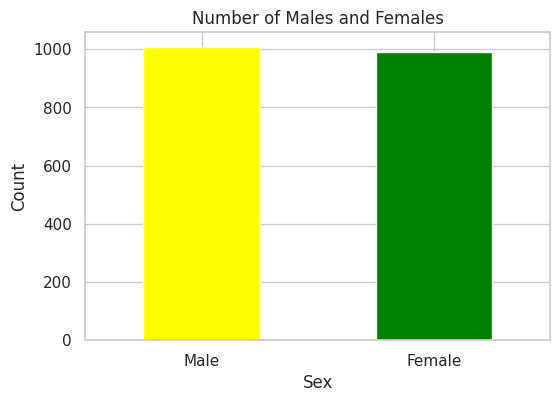

([<matplotlib.axis.XTick at 0x79e579b4c810>,
 [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

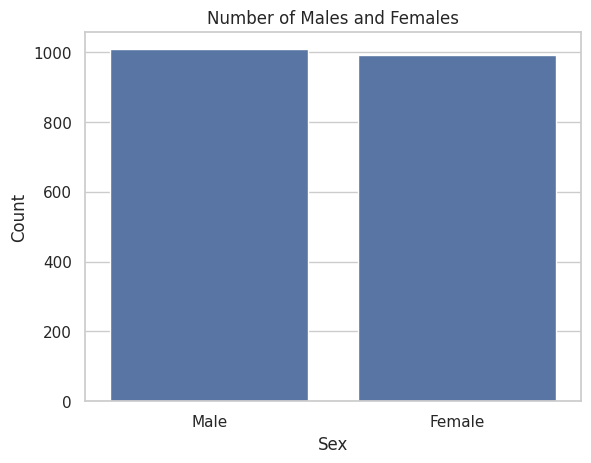

In [78]:
# matplotlib 사용한 막대 그래프
plt.figure(figsize=(6, 4))
data['Sex'].value_counts().plot(kind='bar', color=['yellow', 'green'])
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Number of Males and Females")
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()

# seaborn 사용한 막대 그래프
sns.countplot(data = data, x="Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Number of Males and Females")
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)

Text(0.5, 1.0, 'Blood_Pressure_Abnormality')

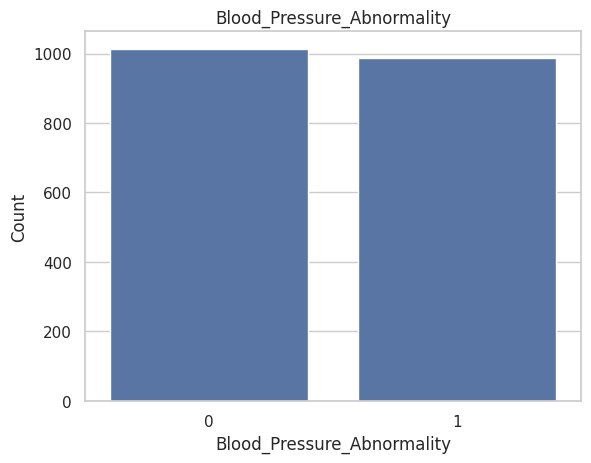

In [79]:
sns.countplot(data = data, x="Blood_Pressure_Abnormality")
plt.xlabel("Blood_Pressure_Abnormality")
plt.ylabel("Count")
plt.title("Blood_Pressure_Abnormality")

<ipython-input-80-45e67a15be7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Physical_activity", data=data, palette="Set3")


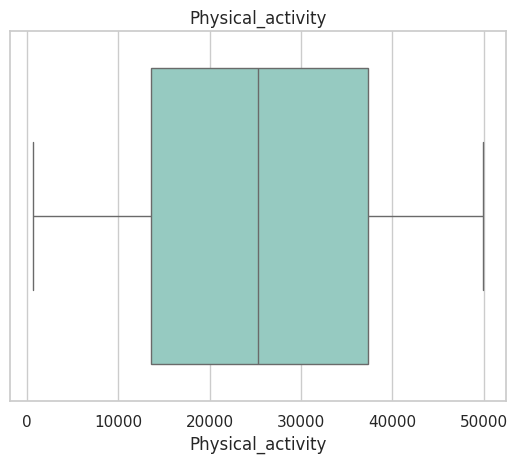

In [80]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Physical_activity", data=data, palette="Set3")
plt.title("Physical_activity")
plt.show()

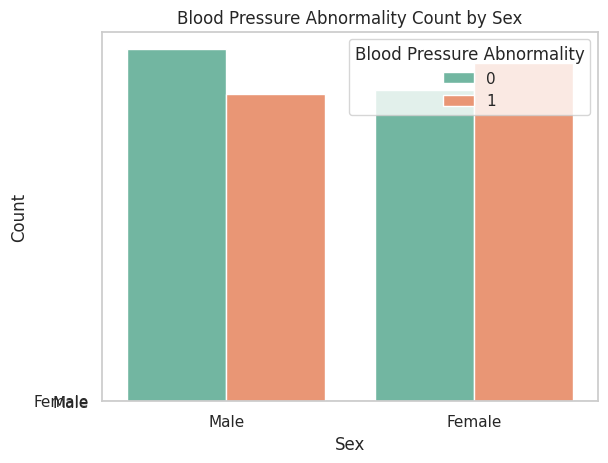

In [92]:
sns.countplot(data=data, x="Sex", hue="Blood_Pressure_Abnormality", palette="Set2")
plt.title("Blood Pressure Abnormality Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.yticks([0, 1], ['Male', 'Female'], rotation=0)
plt.legend(title="Blood Pressure Abnormality")
plt.xticks([0, 1], ['Male', 'Female'], rotation=0)
plt.show()

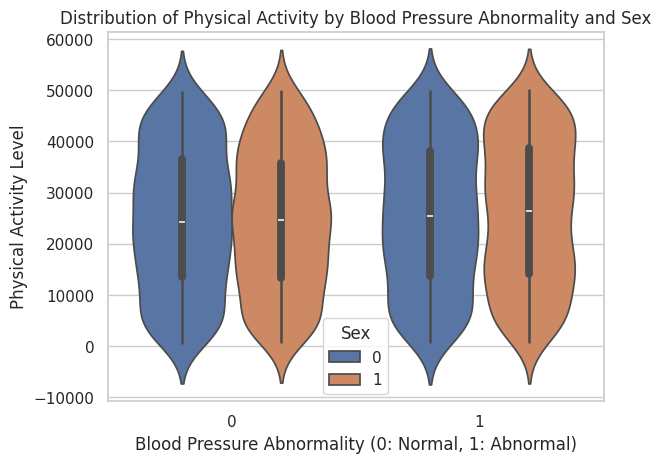

In [96]:
sns.violinplot(x='Blood_Pressure_Abnormality', y='Physical_activity', hue='Sex', data=data)
plt.title('Distribution of Physical Activity by Blood Pressure Abnormality and Sex')
plt.xlabel('Blood Pressure Abnormality (0: Normal, 1: Abnormal)')
plt.ylabel('Physical Activity Level')
plt.legend(title='Sex')
plt.show()

<ipython-input-107-74ffe65492c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], kde = True, ax=ax1)
<ipython-input-107-74ffe65492c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BMI'], kde = True, ax=ax2)


<Axes: xlabel='BMI', ylabel='Density'>

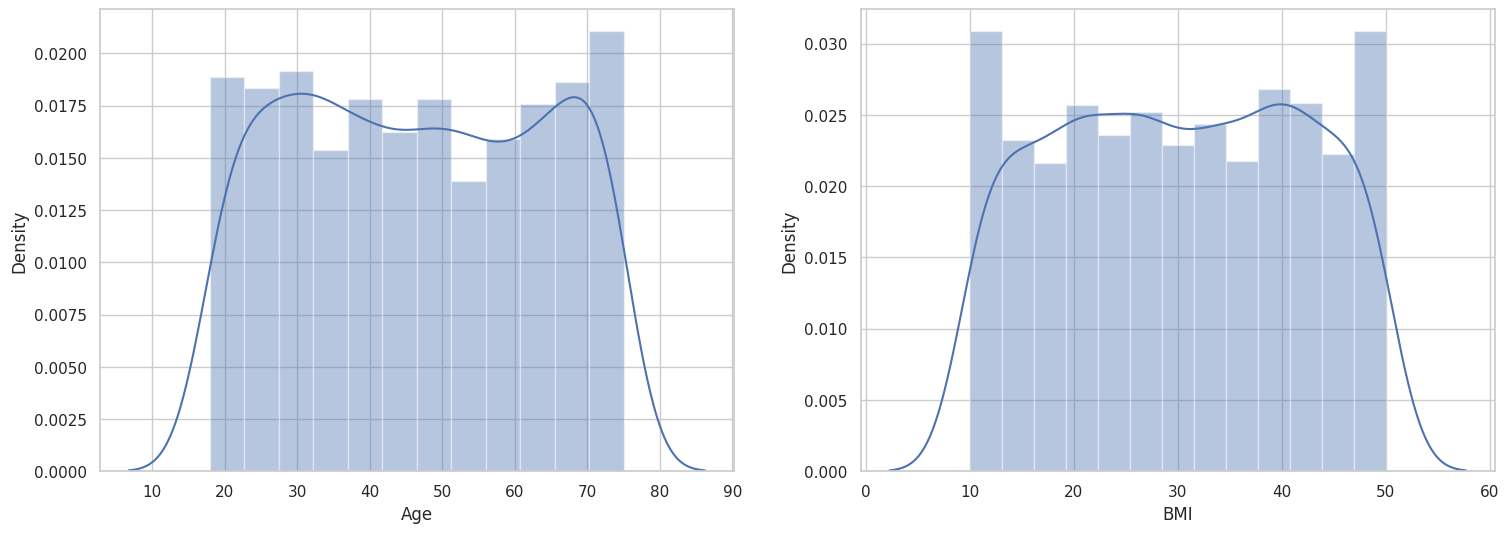

In [107]:
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(data['Age'], kde = True, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(data['BMI'], kde = True, ax=ax2)

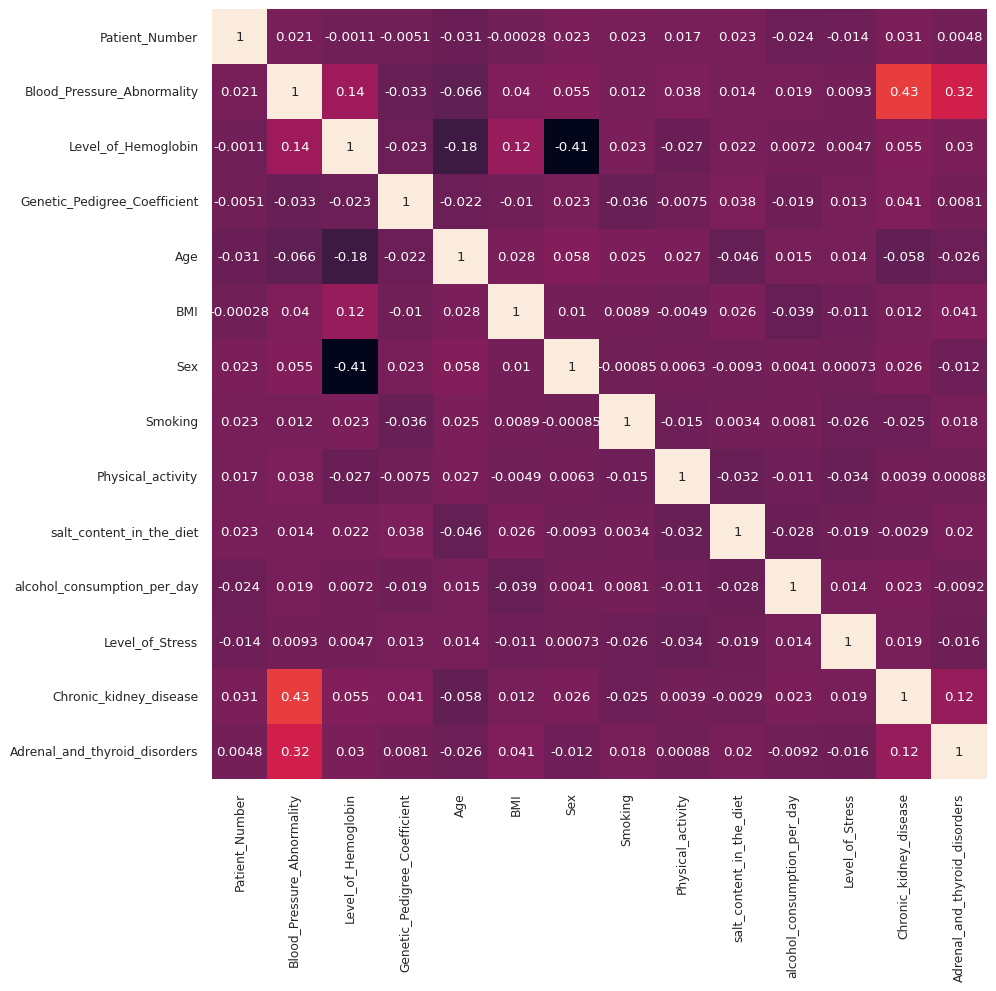

In [110]:
data_corr = data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

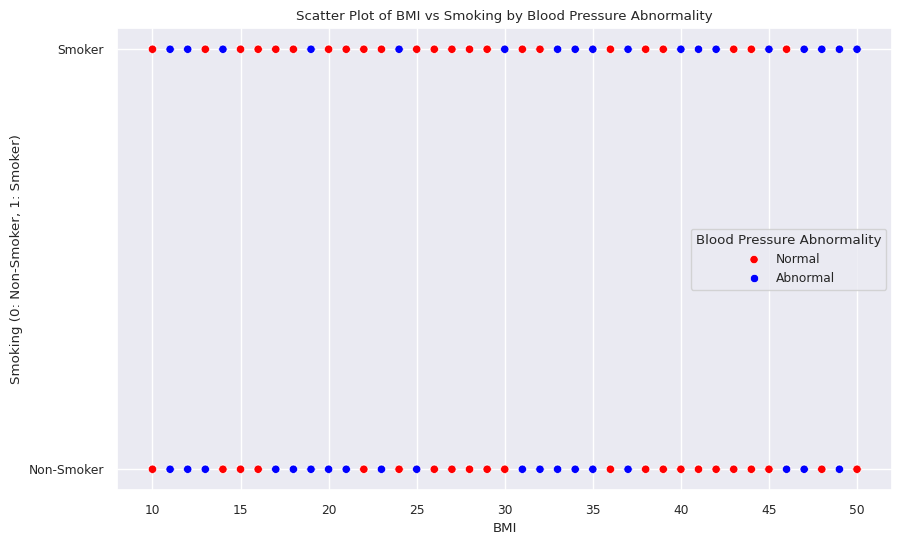

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='BMI', y='Smoking', hue='Blood_Pressure_Abnormality', palette={0: 'blue', 1: 'red'})
plt.title('Scatter Plot of BMI vs Smoking by Blood Pressure Abnormality')
plt.xlabel('BMI')
plt.ylabel('Smoking (0: Non-Smoker, 1: Smoker)')
plt.legend(title='Blood Pressure Abnormality', labels=['Normal', 'Abnormal'])
plt.yticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.grid(True)
plt.show()